<div style="background-color:rgba(100, 160, 200, 0.33);">

<h1>Tutorial 2 - Transport Layer Protocols</h1>

<p>
Submission process:
</p>
<ul>
<li>Submission deadline is November 17, 14:00 CET (before the lecture) .</li>
<li>Commit and push your solution as single notebook file via git as <span style="font-family: monospace">./tutorial2/tutorial2.ipynb</span>. Please take care of the correct subfolder/filename since submission is denied otherwise.</li>
<li>During the first lecture after the deadline we will discuss a sample solution in class.</li>
<li>Afterwards, you have time until November 24, 14:00 CET (before the lecture) to submit a corrected version of your submission:</li>
<ol>
  <li>Rework your solution according to our discussion in class.</li>
  <li>Commit and push the corrected version as single file via git as <span style="font-family: monospace">./tutorial2/tutorial2.ipynb</span>. Please take care of the correct filename since submission is denied otherwise.</li>
</ol>
</ul>

<p>
Remarks:
</p>
<ul>
<li>Grading is done based on both versions of your submission.</li>
<li>If the first submission is missing your submission will not be graded.</li>
<li>If the second submission contains major flaws after revision not more than half of the credits for this tutorial can be achieved.</li>
<li>A sample solution is provided after November 24, 14:00 CET eventually.</li>
<li>
Please use <a href="mailto:acn@net.in.tum.de">acn@net.in.tum.de</a> for questions regarding lecture, tutorial, and project of ACN.
</li>
</ul>
</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3>Problem 1 TCP Congestion Control Fairness (4 credits)</h3>

<p>
This problem is focused on TCP congestion control. Different algorithms are observed and the fairness between them is evaluated.
</p>
</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
In the following we consider two TCP flows which share the same bottleneck link. The next cell visualizes the sending rates of the two flows.
</p>
</div>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Download RTT CSV from ACN website
!wget -N https://acn.net.in.tum.de/exercise/tcp_cc.npz

# Load file into Python
data = np.load('tcp_cc.npz')
ts, flow1, flow2 = data['ts'], data['flow1'], data['flow2']

--2022-11-15 14:25:43--  https://acn.net.in.tum.de/exercise/tcp_cc.npz
Resolving acn.net.in.tum.de (acn.net.in.tum.de)... 2a00:4700:0:9:f::1, 188.95.232.11
Connecting to acn.net.in.tum.de (acn.net.in.tum.de)|2a00:4700:0:9:f::1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘tcp_cc.npz’ not modified on server. Omitting download.



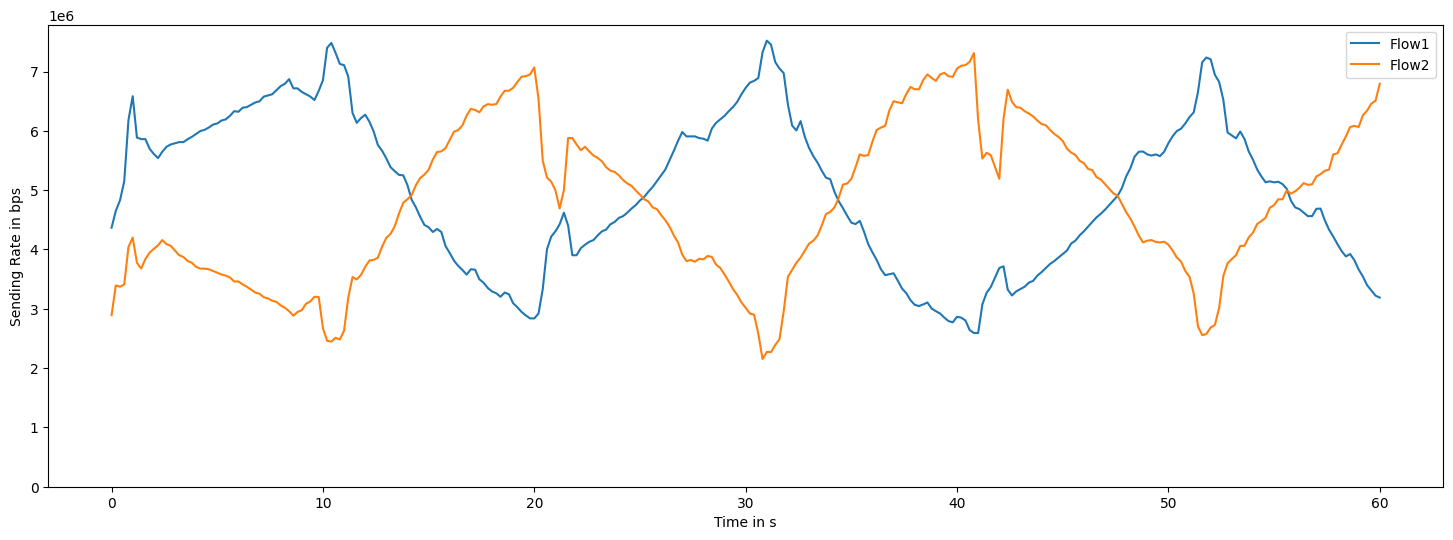

In [2]:
# Helper function to plot data
def plot(*data, x_label=None, y_label=None, legends=[], y_min=None, y_max=None):
    plt.figure(figsize=(18, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for xs, ys in data:
        plt.plot(xs, ys)
    plt.legend(legends)
    plt.gca().set_ylim(bottom=y_min, top=y_max)


plot((ts, flow1), (ts, flow2), x_label='Time in s', y_label='Sending Rate in bps', legends=['Flow1', 'Flow2'], y_min=0)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>a) [0.5 credits]</b>
One of the flows uses Cubic congestion control, the other one BBR. Identify which of the flows uses BBR. No credits without short reasoning.
</p>

</div>

Flow1 is using BBR while Flow2 is using Cubic congestion control. The reason for this is, that for Flow1, we can see a Startup and Drain pattern. For the Flow2, we can see the typical rise and then drop of the sending rate by a constant amount as the congestion window is decreased by a constant amount.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>b) [0.5 credits]</b>
Write a function <span style="font-family: monospace">compute_sum()</span> which computes the total sending rate of two flows. It receives two lists and should return a list of the same size.
</p>

</div>

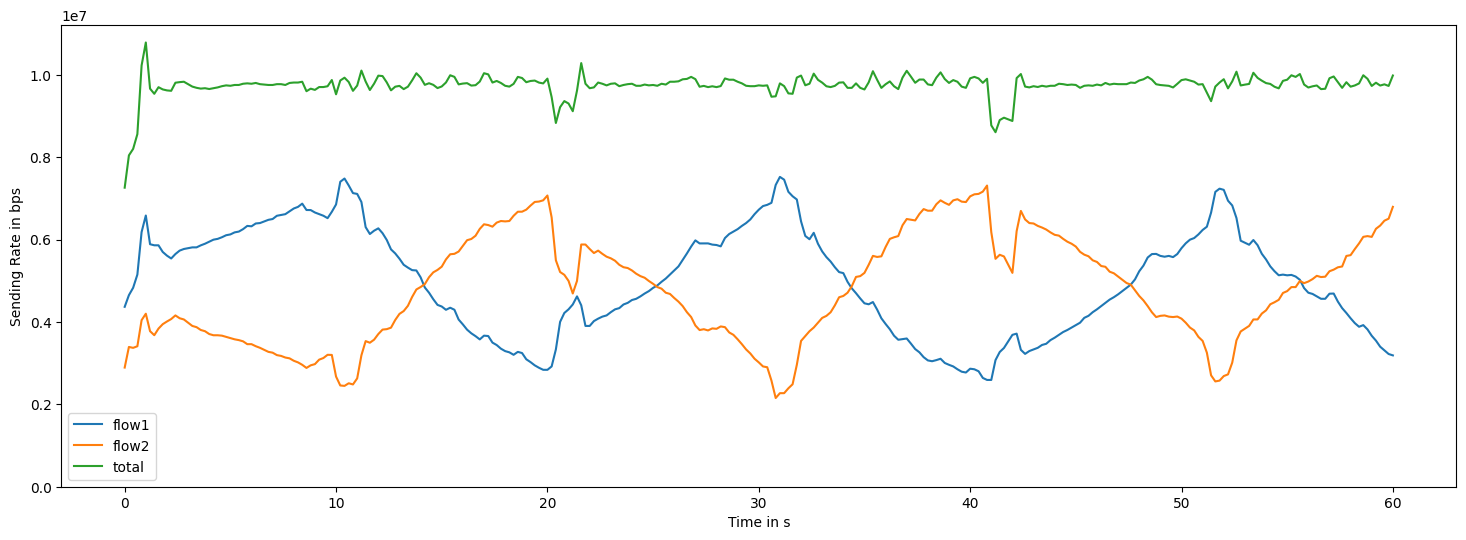

In [3]:
def compute_sum(flow1, flow2):
    # begin insert code
    flow1 = [f1 + f2 for f1, f2 in zip(flow1, flow2)]
    # end insert code

    return flow1

plot((ts, flow1), (ts, flow2), (ts, compute_sum(flow1, flow2)),
     x_label='Time in s', y_label='Sending Rate in bps', legends=['flow1', 'flow2', 'total'], y_min=0)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>c) [0.5 credits]</b>
Based on your results from b) estimate the bottleneck link's capacity.
What happens if the total sending rate of the two flows exceeds this value?
</p>

</div>

As we can see from the total sending rate, the total sending rate is always around 1e7 bps (10000000 bps = 10 mbps). This means the bottleneck link probably has a capacity of 10 megabit per second.
If the total sending rate exceeds this value, the bottleneck link gets more packages than it can handle, and it has to save more and more packages in its buffer (until it possibly runs out of space and needs to drop packages).

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>d) [0.5 credits]</b>
The minimum RTT of both flows is 50ms. Compute the path's BDP using the results from b) in kbit.
</p>

</div>

In [4]:
BDP = 0
# begin insert code
# average of link capacity * RTT
BDP = np.average(compute_sum(flow1, flow2)) * 50
# convert to kbit
BDP /= 1000
# end insert code
print('BDP: {:.2f} kbit'.format(BDP))

BDP: 486873.83 kbit


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>e) [0.5 credits]</b>
In the following you will quantify the fairness of the two flows using 
<a href="https://tools.ietf.org/html/rfc5166#section-2.3.1">Jain's Fairness Index</a>. Explain two advantages of this index.
</p>

</div>

- It works with an arbitrary number of flows
- According to RFC 5166, it does not take into account the different characteristics of flows (like their RTT) and only takes a look at the share of throughput of the connections

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>f) [1 credits]</b>
Write a function <span style="font-family: monospace">compute_fairness()</span> which receives a list of equal sized lists an then computes Jain's Index elementwise.
</p>

</div>

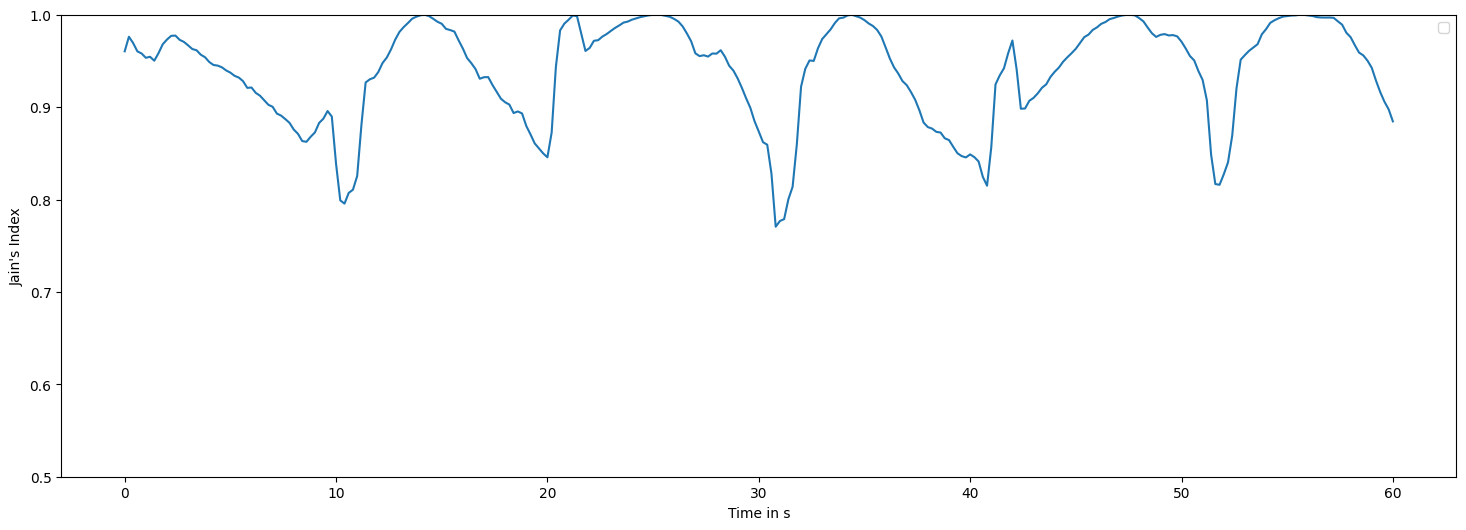

In [5]:
# Example:
# input: [[1, 2, 3], [4, 5, 6]]
# output: [jain(1,4), jain(2, 5), jain(3, 6)]
# with jain(x1, x2, ...): jain index of x1, x2, ...

def compute_fairness(*lists):
    
    # this checks is all input lists have same size
    assert len(set(map(len, lists))) == 1
    
    # begin insert code
    lists = np.array(lists)
    result = np.zeros(len(lists[0]))

    for i in range(len(lists[0])):
        # concatenate the ith index of each list to one single list
        current = lists[:, i]
        # calculate jain's index for the current list
        result[i] = np.sum(current) ** 2
        result[i] /= len(current) * np.sum(current ** 2)

    return result
    # end insert code

    # Dummy output
    # returns [1,1, ...] of the same length as the first parameter
    return [1, ] * len(lists[0])

plot((ts, compute_fairness(flow1, flow2)), x_label='Time in s', y_label='Jain\'s Index', y_min=0.5, y_max=1)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>g) [0.5 credits]</b>
Considering the results from e), assess the fairness between Cubic and BBR. Also take the results from the next cell into account (assuming you implemented the <span style="font-family: monospace">compute_fairness</span> function).
</p>

</div>

In [6]:
print('Flow1 transmitted {:.2f} Mbit/s on average.'.format(np.mean(flow1) / 10**6))
print('Flow2 transmitted {:.2f} Mbit/s on average.'.format(np.mean(flow2) / 10**6))

total_fairness = compute_fairness([np.mean(flow1)], [np.mean(flow2)])
print('This results in a total fairness of {:.5f}'.format(total_fairness[0]))

Flow1 transmitted 4.98 Mbit/s on average.
Flow2 transmitted 4.75 Mbit/s on average.
This results in a total fairness of 0.99945


Cubic has a slight disadvantage over BBR. This can be seen as Flow1 on average transmits more than Flow2. When looking at the diagram of subtask f), we can see that the fairness measured by Jain's index drops every 10 ms. When comparing those drops to the graphic displaying the sending rates, we can see that those drops match the decrease of the sending rate of the Cubic congestion control. In those times, the sending rate of BBR increases, using up more of the available throughput.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3>Problem 2 TCP Round-trip-time Estimation (3 credits)</h3>

<p>
This problem is focused on TCP Timestamps Options.
</p>
</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>a) [1 credits]</b>
    TCP can use Timestamps Options to estimate the RTT of a connection. 
    Have a look at <a href="https://tools.ietf.org/html/rfc7323">RFC 7323</a> to understand how TCP Timestamps Options work.
    The options contains two fields:
</p>
<ul>
    <li>TS Value (TSval)</li>
    <li>TS Echo Reply (TSecr).</li>
</ul>

<p>
    Briefly explain (in your own words) how these values are used to estimate the RTT. 
</p>

</div>

One side sends its current timestamps in the TCP header using the TSval field. The other side then replies and set the TSecr field to the value of the TSval field it is replying to. When receiving a package, the TSecr field can be used to lookup the sending time of the original packet and the timestamps of sending and receiving can be used to estimate the RTT.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
In the following you will write code which computes RTT estimations from TCP Timestamp Options.
Keep in mind that this time we are a passive observer of the connection and do not have any information about the internal TCP state of any of the endpoints. This means we cannot rely on the pseudo-timestamp values contained in the options. 
</p>
</div>

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Download RTT CSV from ACN website
!wget -N https://acn.net.in.tum.de/exercise/tcp_timestamp.npz

# Load file into Python
data = np.load('tcp_timestamp.npz')
flow1_tsval, flow1_tsecr = data['flow1_tsval'], data['flow1_tsecr']
flow2_tsval, flow2_tsecr = data['flow2_tsval'], data['flow2_tsecr']
flow3_tsval, flow3_tsecr = data['flow3_tsval'], data['flow3_tsecr']
flow4_tsval, flow4_tsecr = data['flow4_tsval'], data['flow4_tsecr']

--2022-11-15 14:25:44--  https://acn.net.in.tum.de/exercise/tcp_timestamp.npz
Resolving acn.net.in.tum.de (acn.net.in.tum.de)... 2a00:4700:0:9:f::1, 188.95.232.11
Connecting to acn.net.in.tum.de (acn.net.in.tum.de)|2a00:4700:0:9:f::1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘tcp_timestamp.npz’ not modified on server. Omitting download.



In [8]:
# Helper function to plot data
def plot(*data, x_label=None, y_label=None, legends=[], y_min=None, y_max=None):
    plt.figure(figsize=(18, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for xs, ys in data:
        plt.plot(xs, ys)
    plt.legend(legends)
    plt.gca().set_ylim(bottom=y_min, top=y_max)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>b) [1 credits]</b>
Write a function <span style="font-family: monospace">compute_rtt()</span> which receives as input two lists:
    <ul>
    <li>tsval: contains tuples with (timestamp, tsval) which contains all tsval sent and the according timestamp.</li>
    <li>tsecr: contains tuples with (timestamp, tsecr) which contains all tsecr received and the according timestamp.</li>
    </ul>
    You can assume that the values are only captured on the sending side of the connection.
    
The function should return a list of tuples containing (timestamp, rtt).
</p>

</div>

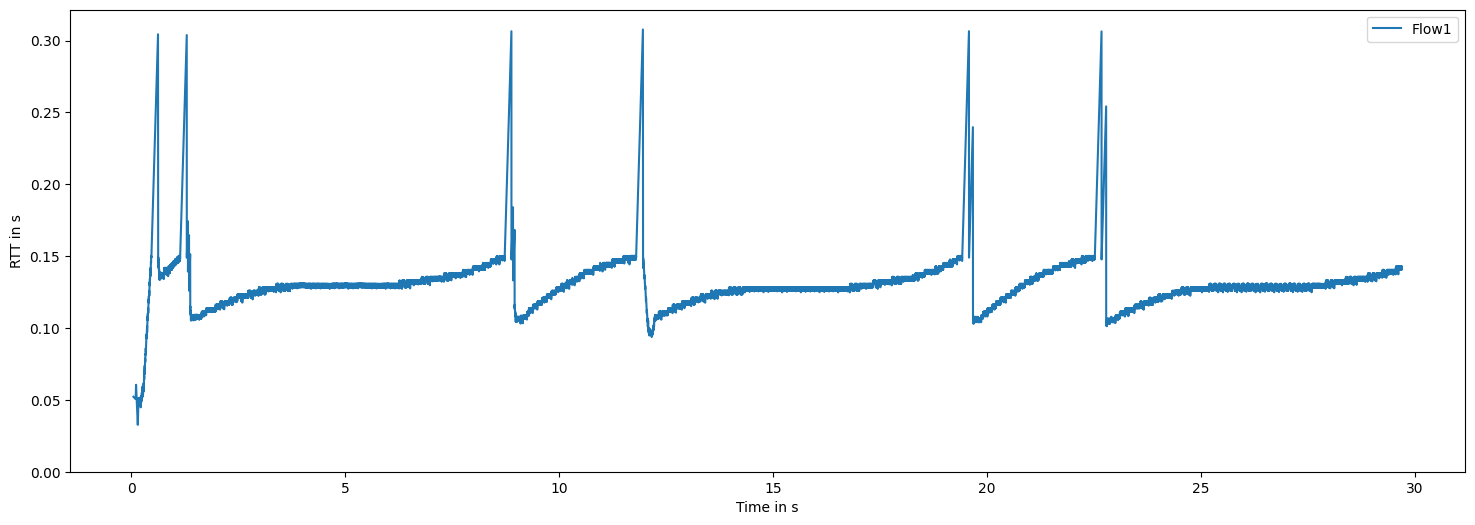

In [20]:
def compute_rtt(ts_val, ts_ecr):
    # begin insert code
    # create a dict for looking up send timestamps given a tsval
    lookup = {tsval : ts for (ts, tsval) in ts_val}

    # return tuples of the recv timestamp and the difference between the recv ts and the send ts
    return [(ts, ts - lookup[tsecr]) for (ts, tsecr) in ts_ecr]
    # end insert code

    return [(0, 0)]

plot(zip(*compute_rtt(flow1_tsval, flow1_tsecr)), x_label='Time in s', y_label='RTT in s', legends=['Flow1'], y_min=0)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>c) [1 credits]</b>
The dataset contains four TCP flows using different congestion control algorithms.
For each flow, try to find out which algorithm was used and explain your reasoning.
You do not get any credits without an explanation.
</p>

</div>

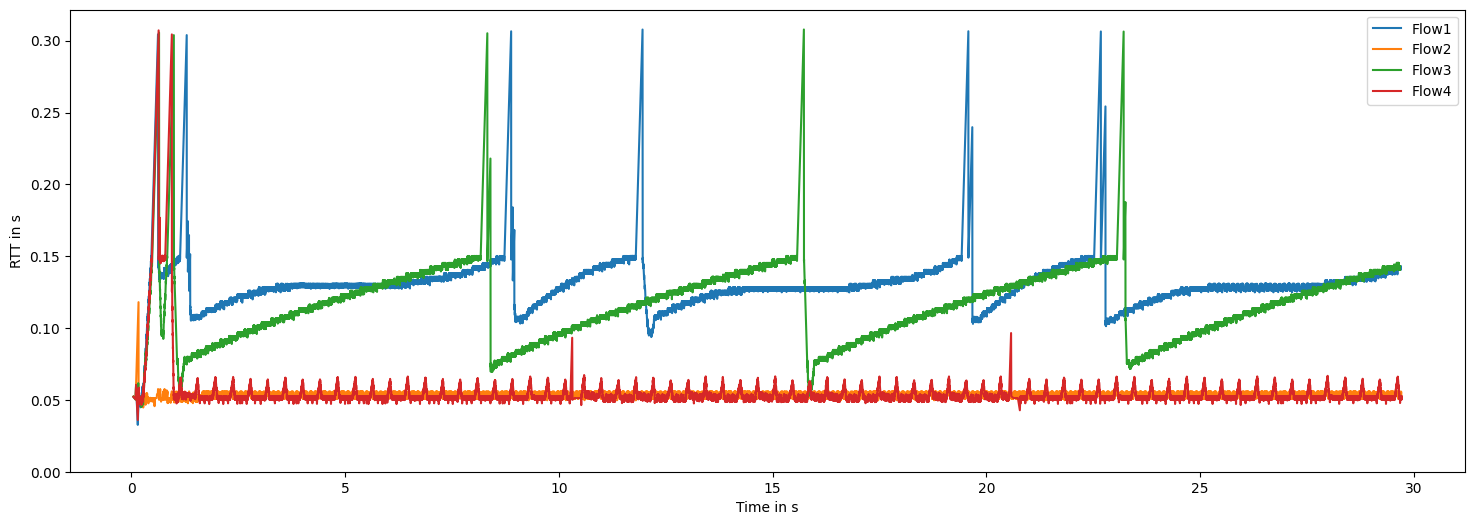

In [10]:
plot(zip(*compute_rtt(flow1_tsval, flow1_tsecr)),
     zip(*compute_rtt(flow2_tsval, flow2_tsecr)),
     zip(*compute_rtt(flow3_tsval, flow3_tsecr)),
     zip(*compute_rtt(flow4_tsval, flow4_tsecr)),
     x_label='Time in s', y_label='RTT in s',
     legends=['Flow1', 'Flow2', 'Flow3', 'Flow4'], y_min=0)

Flow1: Cubic, because of the cubic increase and the two spikes that can usually be seen for the Cubic function.
Flow2: BBR, because of the spike in the beginning and then a relatively constant RTT.
Flow3: Reno, because of the typical "saw tooth" pattern we see due to the linear increase of the congestion window and the sudden decrease on package loss.
Flow4: Vegas, because of the smaller decrease after the initial spike and then a relatively constant RTT.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3>Problem 3 Exponential Weighted Moving Average (3 credits)</h3>

<p>
In this exercise you will compute the retransmission timout of a TCP connection. The first cell downloads a csv file which contains RTT samples of a TCP connection. You will then analyze the RTT values and finally compute the retransmission timout.
</p>
</div>

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Download RTT CSV from ACN website
!wget -N https://acn.net.in.tum.de/exercise/tcp_rtt.npz

# Load file into Python
data = np.load('tcp_rtt.npz')
ts, rtt = data['ts'], data['rtt']

--2022-11-15 14:25:45--  https://acn.net.in.tum.de/exercise/tcp_rtt.npz
Resolving acn.net.in.tum.de (acn.net.in.tum.de)... 2a00:4700:0:9:f::1, 188.95.232.11
Connecting to acn.net.in.tum.de (acn.net.in.tum.de)|2a00:4700:0:9:f::1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘tcp_rtt.npz’ not modified on server. Omitting download.



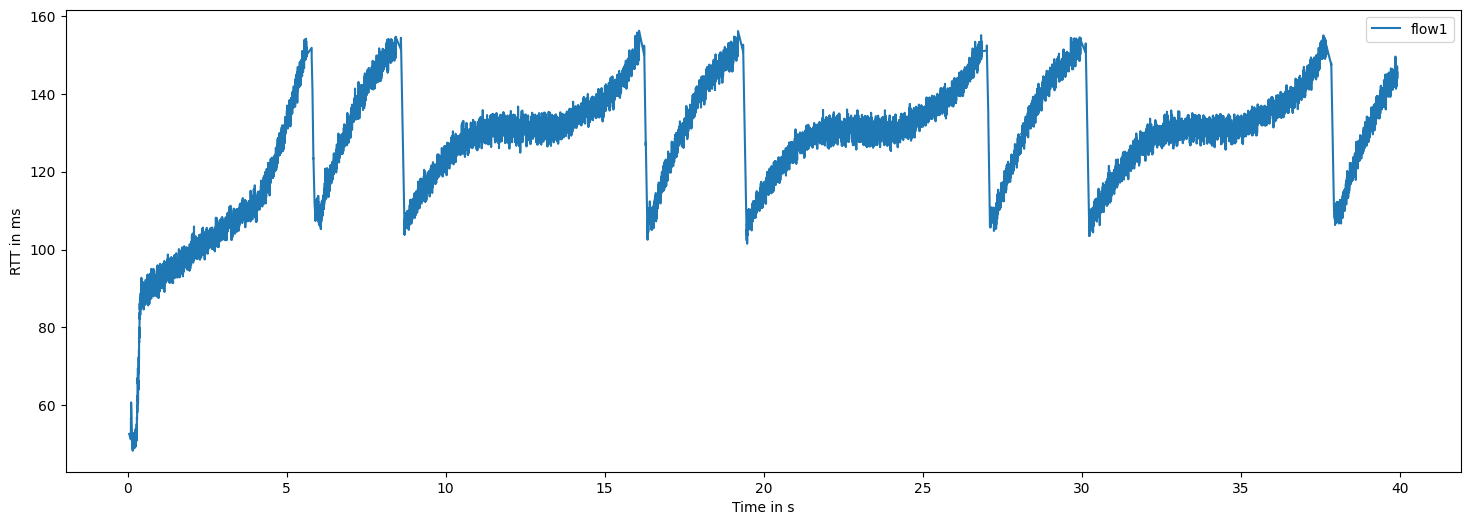

In [12]:
# Helper function to plot data
def plot(*data, x_label=None, y_label=None, legends=[], y_min=None, y_max=None):
    plt.figure(figsize=(18, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for xs, ys in data:
        plt.plot(xs, ys)
    plt.legend(legends)
    plt.gca().set_ylim(bottom=y_min, top=y_max)


plot((ts, rtt), x_label='Time in s', y_label='RTT in ms', legends=['flow1'])

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>a) [0.1 credits]</b>
Have a look at the above graph. Which congestion control algorithm was used by the TCP sender? (No explanation required)
</p>
</div>

Cubic

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>b) [0.5 credits]</b>
Write a function to compute the exponential weighted moving average.
The function <span style="font-family: monospace">ewma()</span> gets two parameters, a list of values and a value alpha as weight for the new samples.
</p>
</div>

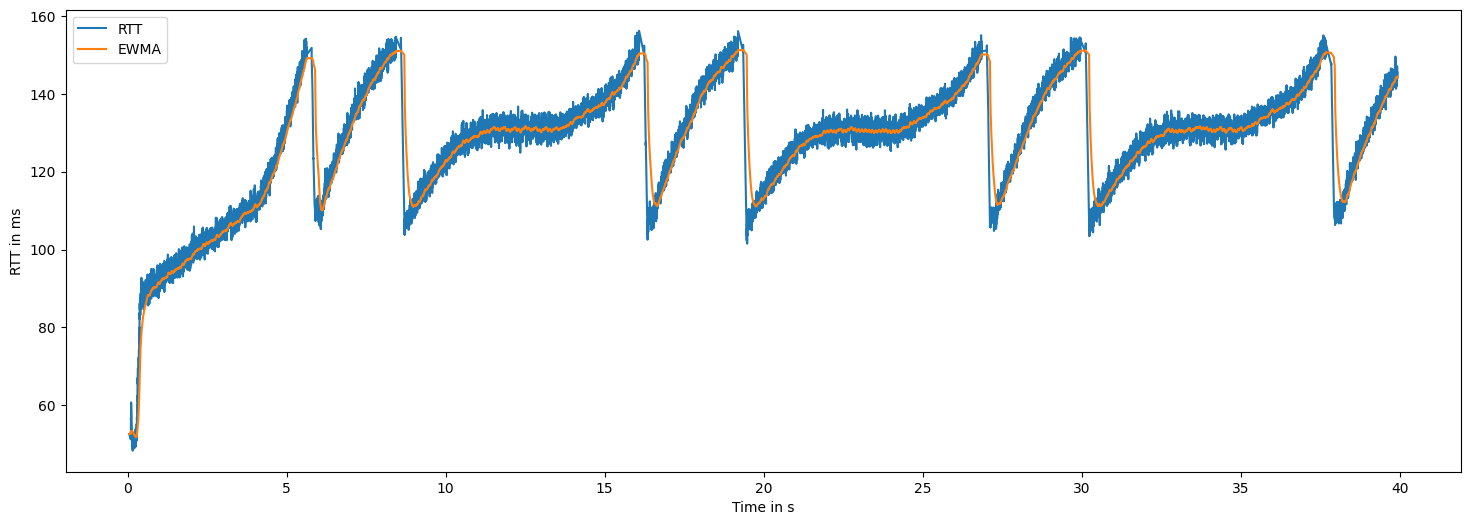

In [13]:
def ewma(values, alpha):
    # begin insert code
    result = np.zeros(len(values))
    result[0] = values[0]

    for i in range(1, len(result)):
        result[i] = alpha * values[i] + (1 - alpha) * result[i - 1]

    return result
    # end insert code
    return values

smoothed_rtt = ewma(rtt, 0.025)
plot((ts, rtt), (ts, smoothed_rtt), x_label='Time in s', y_label='RTT in ms', legends=['RTT', 'EWMA'])


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>c) [0.4 credits]</b>
Compare the results when using different values for alpha and explain how it impacts the resulting average.
</p>
</div>

In [14]:
print("Original:", np.average(rtt))
for alpha in [0.5, 0.125, 0.025, 0.05, 0.005]:
    print("Alpha = {}: {}".format(alpha, np.average(ewma(rtt, alpha))))

Original: 127.28602322278181
Alpha = 0.5: 127.2801723430965
Alpha = 0.125: 127.24514158065818
Alpha = 0.025: 127.06024432431074
Alpha = 0.05: 127.17535325660607
Alpha = 0.005: 126.20487983355203


The smaller alpha gets, the less the curve follows small and sudden trends. It basically smoothens out the curve. It almost doesn't impact the result average until the alpha gets very very small and the EWMA is not able to follow the signal anymore.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>d) [1.5 credits]</b>
    Have a look at <a href="https://tools.ietf.org/html/rfc6298">RFC 6298</a> how TCP computes the retransmission timeout (RTO). In the following we implement a function to compute this value for our connection. We will ignore the clock granularity G, e.g. consider it small enough.
</p>

<p>
Write the function <span style="font-family: monospace">compute_rto()</span> which receives a list of RTT samples and computes the RTO values using the two state variables SRTT (smoothed round-trip time) and RTTVAR (round-trip time variation) as explained in <a href="https://tools.ietf.org/html/rfc6298">RFC 6298</a>.
</p>
</div>

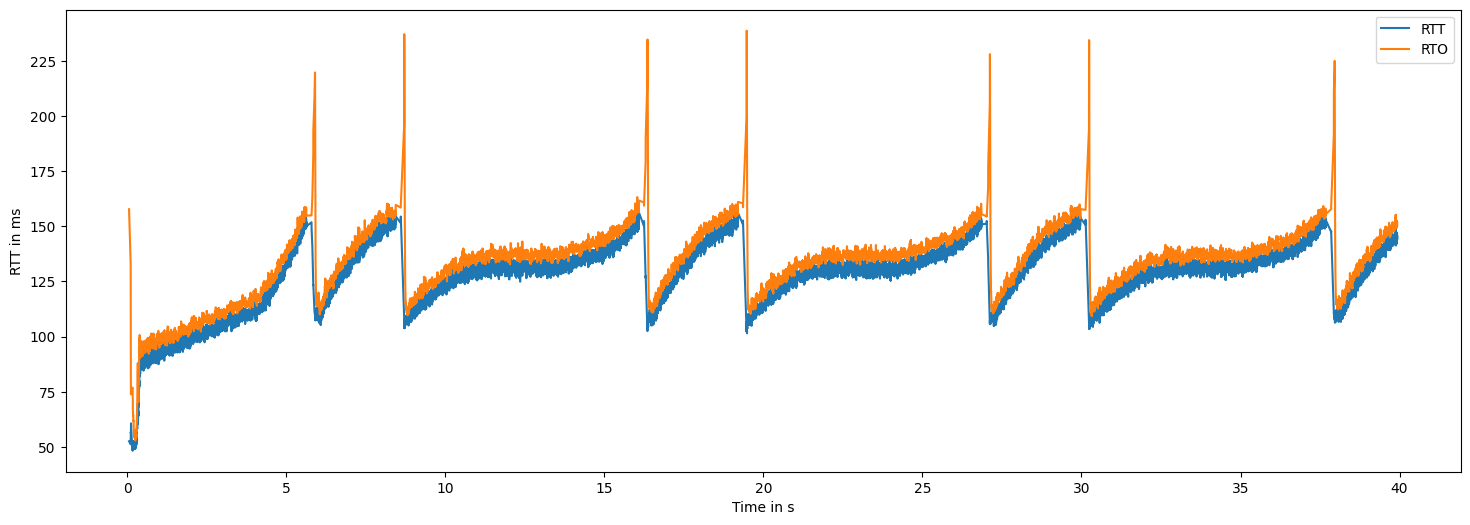

In [15]:
def compute_rto(samples):
    # constants
    ALPHA = 0.125
    BETA = 0.25
    K = 4
    G = 0

    # begin insert code
    # copy the array, so we can overwrite the values
    samples = np.copy(samples)

    # calculate the first RTO value
    SRTT = samples[0]
    RTTVAR = SRTT / 2
    samples[0] = max(1, SRTT + max(G, K * RTTVAR))

    # calculate the additional RTO values
    for i in range(1, len(samples)):
        RTTVAR = (1 - BETA) * RTTVAR + BETA * abs(SRTT - samples[i])
        SRTT = (1 - ALPHA) * SRTT + ALPHA * samples[i]
        samples[i] = max(1, SRTT + max(G, K * RTTVAR))
    # end insert code
    return samples

plot((ts, rtt), (ts, compute_rto(rtt)), x_label='Time in s', y_label='RTT in ms', legends=['RTT', 'RTO'])

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>e) [0.5 credits]</b>
Discuss the influence on TCP if the RTT is considerably overestimated or underestimated.
</p>

</div>

With overestimation, TCP won't fully use the throughput of the link as it will send packages with a slower speed than the link could actually take.
With underestimation, TCP will send packages faster than the network can handle. This could lead to some kind of congestion in the network.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3>Problem 4 QUIC (3 credits)</h3>

<p>
This problem is about the QUIC protocol.
QUIC is considered as the sucessor for the TCP/TLS stack and is the based for the new HTTP/3 standard.
</p>
</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>a) [0.5 credits]</b>
Name all protocols which are usually (e.g. HTTP/1.1) used on top of IP when you visit <a href="https://acn.net.in.tum.de/">https://acn.net.in.tum.de/</a>.
Which protocols will be used when you would visit the same page with HTTP/3?
</p>

</div>

<b>HTTP/1.1:</b>
<ul>
    <li>TCP</li>
    <li>TLS</li>
    <li>HTTP/1.1</li>
</ul>

<b>HTTP/3:</b>
<ul>
    <li>UDP</li>
    <li>QUIC</li>
    <li>HTTP/3</li>
</ul>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
    The QUIC protocol is currently standardized by the IETF.
    You can find the RFC <a href="https://www.rfc-editor.org/rfc/rfc9000.html">here</a>.
    For the next questions you need to have a closer look into the draft.
</p>

</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>b) [0.5 credits]</b>
    QUIC differenciates between packets and frames.
    Name <b>all</b> packet types available in QUIC.
</p>

</div>

- Initial
- 0-RTT Protected
- Handshake
- Retry
- Version Negotiation
- Short header

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>c) [0.5 credits]</b>
    Name <b>5</b> frame types specified in the RFC.
</p>

</div>

- PADDING
- PING
- ACK
- STREAM
- RESET_STREAM

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
    Qlog is a logging format for QUIC. The next cell downloads a qlog file of QUIC connection which transferred a small file between two hosts. 
</p>

</div>

In [16]:
import json

# Download qlog file
!wget -N https://acn.net.in.tum.de/exercise/quic.qlog

# Load file into Python
with open('quic.qlog') as f:
    data = json.load(f)

print('\nThe qlog is formatted as follows:')
print(data.keys())

print('\nThis qlog contains {} traces.'.format(len(data['traces'])))
print('Traces is a list containing the following values:')
print(data['traces'][0].keys())

events = data['traces'][0]['events']
print('\nEach trace containes a list of events:')
print(events[0])

--2022-11-15 14:25:46--  https://acn.net.in.tum.de/exercise/quic.qlog
Resolving acn.net.in.tum.de (acn.net.in.tum.de)... 2a00:4700:0:9:f::1, 188.95.232.11
Connecting to acn.net.in.tum.de (acn.net.in.tum.de)|2a00:4700:0:9:f::1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘quic.qlog’ not modified on server. Omitting download.


The qlog is formatted as follows:
dict_keys(['qlog_version', 'title', 'traces'])

This qlog contains 1 traces.
Traces is a list containing the following values:
dict_keys(['vantage_point', 'title', 'description', 'event_fields', 'configuration', 'common_fields', 'events'])

Each trace containes a list of events:
[0, 'transport', 'datagram_received', {'byte_length': 1252, 'addr_from': {'ip_v4': '10.0.0.2', 'port_v4': 43109}, 'addr_to': {'ip_v4': '10.0.0.1', 'port_v4': 28695}}]


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
    For the following questions you can either parse the qlog file in Python, or use the qvis tool which nicely visualizes the qlog. We recommend the later.
    You can use the version hosted at <a href="https://qvis.edm.uhasselt.be/">https://qvis.edm.uhasselt.be/</a>.
</p>
<p>
    Also, the format of the file is specified in <a href="https://tools.ietf.org/html/draft-marx-qlog-main-schema-01">this draft</a>.
</p>

</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>d) [0.5 credits]</b>
    Which QUIC version is used in this connection. Paste the version ID as well as which version is specified by it (<a href="https://github.com/quicwg/base-drafts/wiki/QUIC-Versions">hint</a>). <br>
    Also, find out which QUIC implementation was used to generate the qlog file.
</p>

</div>

QUIC version: 0xff000020 (IETF according to the FCFS Space). This can be seen in the first data sent (event nr. 1).

QUIC implementation: Picoquic (rust library). This can be seen as it's mentioned multiple times in the log files, for example in the transport parameters (event nr. 3).

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
    The qlog containes HTTP/3 request response pair. The request can be found in event 23.
</p>

</div>

In [17]:
import pprint
pprint.pprint(events[23])

[5660,
 'transport',
 'packet_received',
 {'frames': [{'connection_id': '0b742c40802075c3',
              'frame_type': 'new_connection_id',
              'reset_token': '461136205168acc770a4727140d86cb5',
              'retire_before': 0,
              'sequence_number': 1},
             {'connection_id': 'de22c3d56294eb4c',
              'frame_type': 'new_connection_id',
              'reset_token': '26661e280039cc75462416928029c39d',
              'retire_before': 0,
              'sequence_number': 2},
             {'connection_id': 'e1b91d3f4241c41f',
              'frame_type': 'new_connection_id',
              'reset_token': '3201796f1fdce92446e74c64d18d03da',
              'retire_before': 0,
              'sequence_number': 3},
             {'connection_id': '4fba79f6d325177a',
              'frame_type': 'new_connection_id',
              'reset_token': 'e6049a1d429f9211b22968e3edb65740',
              'retire_before': 0,
              'sequence_number': 4},
             {'

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>e) [0.5 credits]</b>
    <ul>
        <li>Name the packet type included in this event and explain why this packet type has to be used.</li>
        <li>Name <b>and</b> briefly explain all frame types in this event.</li>
    <ul>
</p>

</div>

Packet type: It is a 1-RTT Packet, as can be seen from the "packet_type" field. This packet type is used when the handshake is completed and the 1-RTT keys are available

Frame types used:
- NEW_CONNECTION_ID frame: According to the RFC, this frame provides its peer with alternative connection IDs, as you're not allowed to reuse a connection id when sending from or to a different address.
- STREAM frame: A stream frame creates a stream and carries stream data.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>f) [0.5 credits]</b>
    <ul>
        <li>Which event carries the response of the server?</li>
        <li>How large is the file requested by the client?</li>
    <ul>
</p>

</div>

- Which event carries the response of the server: Event nr. 32 (the packet containing the only stream frame sent by the server)
- How large is the file requested by the client: 100B (see length field of the stream frame)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p><b>Advanced Computer Networking by Prof. Dr.-Ing. Georg Carle</b></p>
<p>Teaching assistants: Sebastian Gallenmüller, Benedikt Jaeger, Max Helm, Patrick Sattler, Johannes Zirngibl</p>
</div>